# User Analytics in the Telecommunication Industry

In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
teledf=pd.read_excel("../data/Week1_challenge_data_source.xlsx")

In [3]:
teledf.shape

(150001, 55)

In [4]:
teledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [5]:
teledf.isnull().sum().sort_values(ascending=False)

Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Bearer Id                                      991
Nb of sec with Vol UL < 1250B                  793
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [32]:
# dropable_columns=[
# "Nb of sec with 37500B < Vol UL",
# "Nb of sec with 6250B < Vol UL < 37500B",
# "Nb of sec with 125000B < Vol DL" ,
# "TCP UL Retrans. Vol (Bytes)"
# "Nb of sec with 31250B < Vol DL < 125000B",
# "Nb of sec with 1250B < Vol UL < 6250B",
# "Nb of sec with 6250B < Vol DL < 31250B",
# "TCP DL Retrans. Vol (Bytes)",
# "HTTP UL (Bytes)",
# "HTTP DL (Bytes)"
# ]
# for el in dropable_columns:
#     teledf.drop([el], axis=1, inplace=True)


Data Exploration

In [6]:
#number of handset types in the dataframe
teledf["Handset Type"].replace({"":None}, inplace=True)
handsetdf=teledf["Handset Type"].value_counts().nlargest(10)
handsetdf

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

<AxesSubplot:>

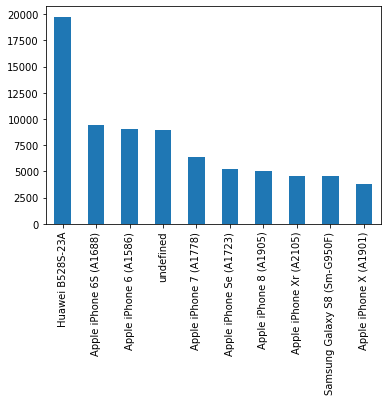

In [7]:

#number of handset types in the dataframe 
handsetdf.plot(kind="bar")


In [8]:
teledf["Handset Manufacturer"].value_counts().nlargest(10)

Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64

In [9]:
teledf["Handset Manufacturer"].replace({"undefined":"NaN"}, inplace=True)
teledf["Handset Manufacturer"].dropna(inplace=True)
clean_headset_count=teledf["Handset Manufacturer"].value_counts().nlargest(10)

<AxesSubplot:>

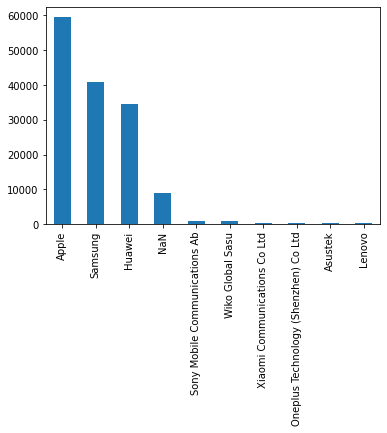

In [10]:
clean_headset_count.plot(kind="bar")

In [11]:
# teledf.loc[teledf["Handset Manufacturer"] == some_value]
clean_headset_count = teledf["Handset Manufacturer"].value_counts().nlargest(3)
clean_headset_count


Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [12]:


appledf=teledf.loc[teledf["Handset Manufacturer"] == "Apple"]
samsungdf=teledf.loc[teledf["Handset Manufacturer"] == "Samsung"]
huaweidf = teledf.loc[teledf["Handset Manufacturer"] == "Huawei"]



In [13]:
apple_handsets=appledf["Handset Type"].value_counts().nlargest(5)
samsung_handsets=samsungdf["Handset Type"].value_counts().nlargest(5)
huawei_handsets=huaweidf["Handset Type"].value_counts().nlargest(5)
print(apple_handsets)
print(samsung_handsets)
print(huawei_handsets)

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


<AxesSubplot:>

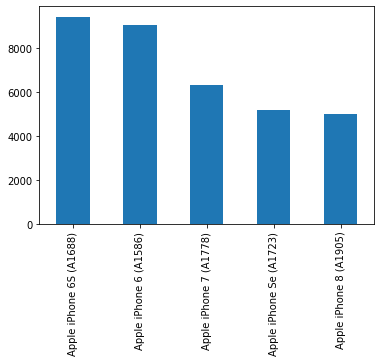

In [14]:
apple_handsets.plot(kind="bar")

<AxesSubplot:>

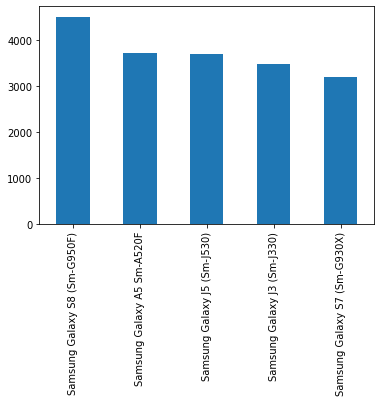

In [15]:
samsung_handsets.plot(kind="bar")

<AxesSubplot:>

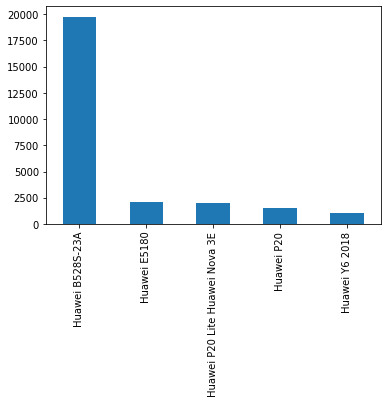

In [16]:
huawei_handsets.plot(kind="bar")



The most used phone on customer hands are the following:



-Huawei B528S-23A (Huawei)
-Apple iPhone 6S (Apple)
-Apple iPhone 6 (Apple)


In [22]:
teledf["Bearer Id"].fillna("Missing", inplace=True)
teledf["MSISDN/Number"].fillna("Missing", inplace=True)


# number_of_sessions=teledf["Bearer Id"].value_counts().nlargest(10)
# number_of_sessions




teledf[
    [
    "MSISDN/Number",
    "Bearer Id",
    "Dur. (ms)",
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
]
].ffill()

teledf[
    [
    "MSISDN/Number",
    "Bearer Id",
    "Dur. (ms)",
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
]
].fillna(0)

teledf[
    [
        "MSISDN/Number",
        "Bearer Id",
        "Dur. (ms)",
        "Total UL (Bytes)",
        "Total DL (Bytes)",
            "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
    ]
].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSISDN/Number       150001 non-null  object 
 1   Bearer Id           150001 non-null  object 
 2   Dur. (ms)           150000 non-null  float64
 3   Total UL (Bytes)    150000 non-null  float64
 4   Total DL (Bytes)    150000 non-null  float64
 5   Youtube DL (Bytes)  150001 non-null  float64
 6   Youtube UL (Bytes)  150001 non-null  float64
 7   Netflix DL (Bytes)  150001 non-null  float64
 8   Netflix UL (Bytes)  150001 non-null  float64
 9   Gaming DL (Bytes)   150001 non-null  float64
 10  Gaming UL (Bytes)   150001 non-null  float64
 11  Other DL (Bytes)    150001 non-null  float64
 12  Other UL (Bytes)    150001 non-null  float64
dtypes: float64(11), object(2)
memory usage: 14.9+ MB


In [20]:


usrdf = teledf["MSISDN/Number"].unique()

final_array=[]
for usr in usrdf:
    if usr != "Missing":
        
        userow=teledf.loc[teledf["MSISDN/Number"] == usr]
        
        nwdf=userow[
            [
                "MSISDN/Number",
                "Bearer Id",
                "Dur. (ms)",
                "Total UL (Bytes)",
                "Total DL (Bytes)",
                "Youtube DL (Bytes)",
                "Youtube UL (Bytes)",
                "Netflix DL (Bytes)",
                "Netflix UL (Bytes)",
                "Gaming DL (Bytes)",
                "Gaming UL (Bytes)",
                "Other DL (Bytes)",
                "Other UL (Bytes)"
            ]
        ]
        print( [
        userow["MSISDN/Number"].iloc[0],
        len(nwdf),
        nwdf["Dur. (ms)"].sum(),
        nwdf["Total UL (Bytes)"].sum(),
        nwdf["Total DL (Bytes)"].sum(),
        nwdf["Youtube DL (Bytes)"].sum()+nwdf["Youtube UL (Bytes)"].sum(),
        nwdf["Netflix DL (Bytes)"].sum()+nwdf["Netflix UL (Bytes)"].sum(),
        nwdf["Gaming DL (Bytes)"].sum()+nwdf["Gaming UL (Bytes)"].sum(),
        nwdf["Other DL (Bytes)"].sum() + nwdf["Other UL (Bytes)"].sum(),
        ])
        
        final_array.append([
            userow["MSISDN/Number"].iloc[0],
            len(nwdf),
            nwdf["Dur. (ms)"].sum(),
            nwdf["Total UL (Bytes)"].sum(),
            nwdf["Total DL (Bytes)"].sum(),
            nwdf["Youtube DL (Bytes)"].sum()+nwdf["Youtube UL (Bytes)"].sum(),
            nwdf["Netflix DL (Bytes)"].sum()+nwdf["Netflix UL (Bytes)"].sum(),
            nwdf["Gaming DL (Bytes)"].sum()+nwdf["Gaming UL (Bytes)"].sum(),
            nwdf["Other DL (Bytes)"].sum() + nwdf["Other UL (Bytes)"].sum(),
            ])
        
# Youtube DL (Bytes)	Youtube UL (Bytes)	Netflix DL (Bytes)	Netflix UL (Bytes)	Gaming DL (Bytes)	Gaming UL (Bytes)	Other DL (Bytes)	Other UL (Bytes)





[33664962239.0, 2, 2083209.0, 69402426.0, 556747398.0, 46397870.0, 30361399.0, 518956134.0, 499850459.0]
[33681854413.0, 2, 1698167.0, 70120478.0, 860830334.0, 52065276.0, 54559509.0, 790398596.0, 1097355968.0]
[33760627129.0, 1, 1361762.0, 27883638.0, 279807335.0, 34425237.0, 23751202.0, 229980251.0, 414908351.0]
[33750343200.0, 1, 1321509.0, 43324218.0, 846028530.0, 36534765.0, 15092588.0, 810387875.0, 761837216.0]
[33699795932.0, 1, 1089009.0, 38542814.0, 569138589.0, 34222253.0, 17539799.0, 531237049.0, 564619822.0]
[33668185951.0, 3, 1249431.0, 103320401.0, 1498816986.0, 53098520.0, 62723807.0, 1418677898.0, 853112271.0]
[33665368271.0, 1, 1035261.0, 47925246.0, 70562047.0, 9120760.0, 31212766.0, 58881157.0, 814303325.0]
[33763490140.0, 2, 1339841.0, 81553359.0, 1076942652.0, 55765125.0, 21835631.0, 1044238664.0, 557396434.0]
[33698743617.0, 1, 941634.0, 42363146.0, 861612261.0, 29297508.0, 19054441.0, 828219634.0, 187669517.0]
[33659219748.0, 8, 5305958.0, 298438759.0, 4358964156

IndexError: single positional indexer is out-of-bounds

In [ ]:
aggregate_info=pd.DataFrame(np.array(final_array), columns=[
    "MSISDN/Number",
    "Bearer Id",
    "Dur. (ms)",
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Youtube Total (Bytes)",
"Netflix Total (Bytes)",
"Gaming Total (Bytes)",
"Other Total (Bytes)",
])

aggregate_info.head()
# print(my_array[:10])


ValueError: Shape of passed values is (624, 5), indices imply (624, 9)